In [2]:
pip install credentials

In [22]:
import pandas as pd
import tweepy 

witter API credentials

In [23]:
consumer_key = "V19QqjT2nzAxHfswknV7Wcr5r"
consumer_secret = "CVKY9IfiQT7qWSH80ZdK1wNwwMO34ixfGqnpgD4533JGXQRc9O"
access_key = "1352158358694813699-UTD7k4uKjlZmX8SNxqQM5USyWLlPyj"
access_secret = "JsrHQGAFwbQs7MuAkv9Rc8yCc2ArV7j9hGoYe14p0jMiB"

In [5]:
alltweets = []

In [14]:
def get_all_tweets(narendramodi):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = narendramodi,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = narendramodi,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(narendramodi+"_tweets.csv")
    return tweets_df

In [25]:
PMO = get_all_tweets("narendramodi")

...6800 tweets downloaded so far
...7000 tweets downloaded so far
...7200 tweets downloaded so far
...7400 tweets downloaded so far
...7600 tweets downloaded so far
...7800 tweets downloaded so far
...8000 tweets downloaded so far
...8200 tweets downloaded so far
...8400 tweets downloaded so far
...8600 tweets downloaded so far
...8800 tweets downloaded so far
...9000 tweets downloaded so far
...9200 tweets downloaded so far
...9400 tweets downloaded so far
...9600 tweets downloaded so far
...9600 tweets downloaded so far


add_centre_tweets = get_all_tweets("DreamZoneSchool")

In [26]:
PMO

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-26 01:26:37,"[{'text': 'RepublicDay', 'indices': [98, 110]}]",[],133733,None,1353876965497872384,und,None,21305,False,Twitter for iPhone,देशवासियों को गणतंत्र दिवस की ढेरों शुभकामनाएं...,India,Narendra Modi,None,None
1,2021-01-25 16:05:27,[],[],38272,None,1353735744116957186,en,None,5803,False,Twitter for iPhone,We are proud of all those who have been confer...,India,Narendra Modi,None,None
2,2021-01-25 15:00:38,[],[],19664,None,1353719432221102082,en,None,3966,False,Periscope,Speaking at the Climate Adaptation Summit 2021...,India,Narendra Modi,None,None
3,2021-01-25 13:32:44,[],[],15746,None,1353697311692476417,en,None,3360,False,Twitter Media Studio,India’s youth is full of energy and remarkable...,India,Narendra Modi,None,None
4,2021-01-25 13:30:17,[],"[{'screen_name': 'lopezobrador_', 'name': 'And...",6350,None,1353696697721884672,en,None,1417,False,Twitter Web App,Concerned to hear about the COVID-19 diagnosis...,India,Narendra Modi,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2020-01-24 13:09:54,[],[],4568,None,1220695220364300289,en,None,1145,False,Twitter Web App,Young Venkatasubramanian did not allow any bar...,India,Narendra Modi,None,None
9596,2020-01-24 13:09:08,[],[],5099,None,1220695025543049217,en,None,1224,False,Twitter Web App,"Be it English Olympiad, Geogenius Olympiad or ...",India,Narendra Modi,None,None
9597,2020-01-24 13:08:22,[],[],6500,None,1220694832399581184,en,None,1405,False,Twitter Web App,"Meet Onkar Singh, who wrote ‘When The Time Sto...",India,Narendra Modi,None,None
9598,2020-01-24 13:07:13,[],[],5037,None,1220694545232384000,en,None,1227,False,Twitter Web App,Winning Hong Kong Mathematics Olympiad- check....,India,Narendra Modi,None,None


In [27]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [31]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(PMO.text))
sentences 

['देशवासियों को गणतंत्र दिवस की ढेरों शुभकामनाएं। जय हिंद!',
 'Wishing all the people of India a Happy #RepublicDay.',
 'Jai Hind!',
 'We are proud of all those who have been conferred the Padma Awards.',
 'India cherishes their contribution to the natio… https://t.co/ue4XJkpi0h Speaking at the Climate Adaptation Summit 2021. https://t.co/7pLbF3YZjq India’s youth is full of energy and remarkable tenacity.',
 'Being among our Yuva Shakti is special.',
 'Here are highlig… https://t.co/9N2VgvXFoq Concerned to hear about the COVID-19 diagnosis of President @lopezobrador_ of Mexico.',
 'The people of India join me i… https://t.co/YlZSjA5dDq Was delighted to interact with my friend Mohd.',
 'Shadab from Aligarh.',
 'Happy to see his passion towards nation buildin… https://t.co/uUZxV3U6VQ मध्य प्रदेश के हरदा जिले के अनुज जैन ने महज 17 साल की उम्र में शिक्षा के क्षेत्र में कई अंतर्राष्ट्रीय उपलब्धियां… https://t.co/plQAv8GsPA कोटा, राजस्थान के आनंद ने 16 साल की उम्र में मैथमेटिक्स के क्षेत्र म

In [32]:
df = pd.DataFrame(sentences, columns=['sentence'])
df 

,sentence
0,देशवासियों को गणतंत्र दिवस की ढेरों शुभकामनाएं...
1,Wishing all the people of India a Happy #Repub...
2,Jai Hind!
3,We are proud of all those who have been confer...
4,India cherishes their contribution to the nati...
...,...
7238,He has won medals in national abacus c… https:...
7239,"S… https://t.co/q8XTq8TZzi Meet Onkar Singh, w..."
7240,Congratulat… https://t.co/TqTIF9ReuH Winning H...
7241,Topping the International Society for Olympiad...


In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [35]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [36]:
calculate_sentiment(text = 'amazing') 

4

In [37]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment) 

In [38]:
df['word_count'] = df['sentence'].str.split().apply(len)
df['word_count'].head(10) 

0     9
1     9
2     2
3    13
4    25
5     7
6    16
7    16
8     3
9    64
Name: word_count, dtype: int64

In [39]:
df

,sentence,sentiment_value,word_count
0,देशवासियों को गणतंत्र दिवस की ढेरों शुभकामनाएं...,0,9
1,Wishing all the people of India a Happy #Repub...,4,9
2,Jai Hind!,0,2
3,We are proud of all those who have been confer...,2,13
4,India cherishes their contribution to the nati...,4,25
...,...,...,...
7238,He has won medals in national abacus c… https:...,7,27
7239,"S… https://t.co/q8XTq8TZzi Meet Onkar Singh, w...",0,21
7240,Congratulat… https://t.co/TqTIF9ReuH Winning H...,4,8
7241,Topping the International Society for Olympiad...,6,22


In [40]:
df['sentiment_value'].describe() 

count    7243.000000
mean        1.877951
std         2.645389
min        -8.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        27.000000
Name: sentiment_value, dtype: float64

In [43]:
df[df['sentiment_value']<0] 

,sentence,sentiment_value,word_count
15,Seeing his grandmother suffer from Alzheimer’s...,-2,45
44,He undertook numerous measures for the… https:...,-1,37
45,https://t.co/5mQh5GuAuk On the way to Kolkata ...,-1,15
57,India remains committed to assist the people o...,-8,29
84,"He was a doyen of music, a st… https://t.co/G1...",-2,114
...,...,...,...
7134,Infrastructure… https://t.co/PvHSyr2a2L हमारी ...,-1,65
7153,No Lokpal in Delhi.,-1,4
7166,NDA has mad… https://t.co/XMkawno1WC Met senio...,-3,15
7172,This is a vi… https://t.co/dYTNDoswK5 বড়ো সংগ...,-3,129


In [42]:
df[df['sentiment_value']>=10] 

,sentence,sentiment_value,word_count
12,His interest and excellence in mathematics has...,10,19
29,#BalSamvadWithPM https://t.co/TYZH1w0eu1 हिमाच...,11,51
67,We have a substantial and multifaceted bilater...,11,49
73,I am thrilled to celebrate his anniversary… At...,11,45
75,Their remarkable energy and passion wa… https:...,11,23
...,...,...,...
6714,आयुष मंत्रालय ने बेहतर स्वास्थ्य और इम्यूनिटी ...,16,104
6846,I salute all those… https://t.co/DA1XOijQPS I ...,15,122
6923,This shows the strong spirit of our nation in ...,11,27
7177,P… https://t.co/fQPEucI1Jz बे गोरोबथाया बर' ओन...,10,68


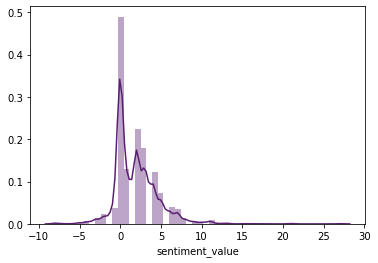

In [45]:
df['index']=range(0,len(df)) 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("dark")
sns.distplot(df['sentiment_value'],color='m')

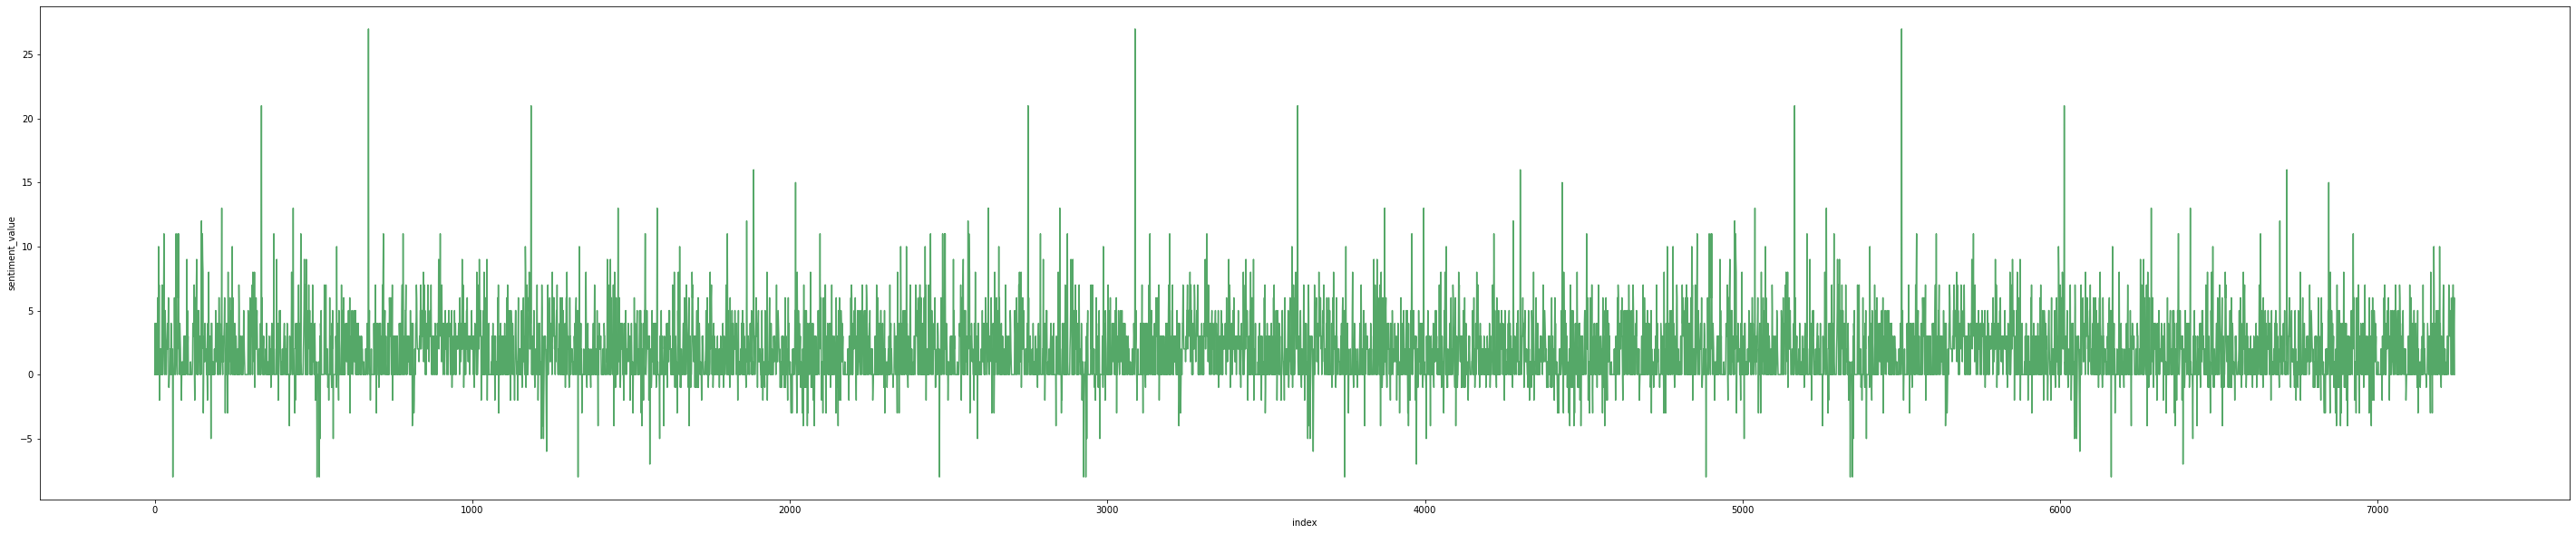

In [60]:
sns.set_color_codes("deep")
plt.figure(figsize=(50, 10))
sns.lineplot(y='sentiment_value',x='index',data=df,color='g')

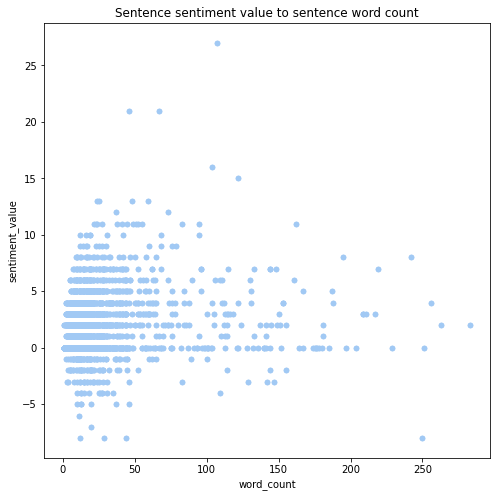

In [62]:
sns.set_color_codes("pastel")
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count',color='b')